# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** 3

**Author 1 (sciper):** Morand Nathann (296190)  
**Author 2 (sciper):** David Croce (327277)   
**Author 3 (sciper):** Felipe Ramirez (331471)   

**Release date:** 05.03.2025   
**Due date:** 19.03.2025 (11:59 pm)


## Key Submission Guidelines:
- **Before submitting your notebook, <span style="color:red;">rerun</span> it from scratch!** Go to: `Kernel` > `Restart & Run All`  
- **Only groups of three will be accepted**, except in exceptional circumstances.  
- **You are not allowed to use any libraries** other than those provided in this notebook.  
- **Failure to follow these guidelines may result in point deductions** during grading.  


[iapr]: https://github.com/LTS5/iapr2025

In [2]:
# Check is at least python 3.9
import sys 
assert (sys.version_info.major == 3) and (sys.version_info.minor == 9)

In [3]:
# Install required packages
!pip install numpy -q
!pip install matplotlib -q
!pip install scikit-image -q
!pip install pillow -q

In [4]:
# Import main packages
from utils.lab_01_utils import *
from skimage.color import rgb2hsv
from skimage.morphology import closing, opening, disk, remove_small_holes, remove_small_objects, binary_dilation

---
# Introduction


In this lab, we will be working with histological data. Histological images are created from tissue samples that are digitized using high-resolution scanners. Without preparation, human tissues lack visual contrast and have poor tissue differentiations. To overcome this issue, clinical institutes use chemical staining to artificially enhance contrast. The most famous one is called HE (hematoxylin and eosin) staining. Hematoxylin stains tissue nuclei with a deep purple while eosin focuses more on extracellular matrix components with a pink stain.

Before running the following code make sure that the images are located as follows:

```code
├── labs
|   ├── utils
|   |   └── lab_01_utils.py
|   └── lab_01_iapr.ipynb
└── data
    └── data_lab_01
        ├── tcga_crc_example.png
        └── tcga_blood_example.png
```
**⚠️ DO NOT CHANGE THIS CONFIGURATION, AS WE WILL RERUN YOUR NOTEBOOK USING THIS EXACT STRUCTURE!**

By running the following cells you will display a HE histological sample of a colorectal cancer case. It is composed of 3 main entities:
* **Mucin**: Grayish mucus that is secreted by the body. The presence of a tumor tends to increase its presence. 
* **Tumor**: Dark purple aggregates (hematoxylin). Mainly composed of cancerous cells.
* **Other**: Mixture of other cells such as stromal or lymphocytes. It appears mainly pink (eosin) but is dotted with nuclei (purple).

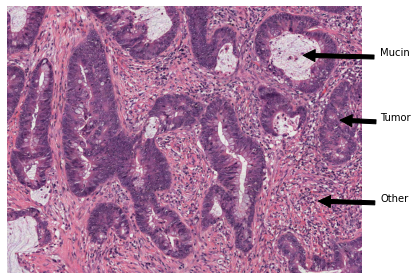

In [5]:
img_he = show_introduction_figure()


# Part 1 - Segmentation [16 pts]

## Part 1.1 - RGB (3 pts)

**Q1 (1 pts)**: In this section, you will have to complete the function `extract_rgb_channels`. The function should extract and return red, blue, and green channels from the input image `img`. Your function will be fed to `plot_colors_histo` to plot the distribution of the colors in the image. 

In [6]:
def extract_rgb_channels(img):
    """
    Extract RGB channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_red: np.ndarray (M, N)
        Red channel of input image
    data_green: np.ndarray (M, N)
        Green channel of input image
    data_blue: np.ndarray (M, N)
        Blue channel of input image
    """

    # Get the shape of the input image
    M, N, _ = np.shape(img)

    # Define default values for RGB channels
    data_red = np.zeros((M, N))
    data_green = np.zeros((M, N))
    data_blue = np.zeros((M, N))

    # ------- CODE HERE --------------
    data_red = img[:, :, 0]   # Red channel
    data_green = img[:, :, 1] # Green channel
    data_blue = img[:, :, 2]  # Blue channel
    # --------------------------------
    
    return data_red, data_green, data_blue

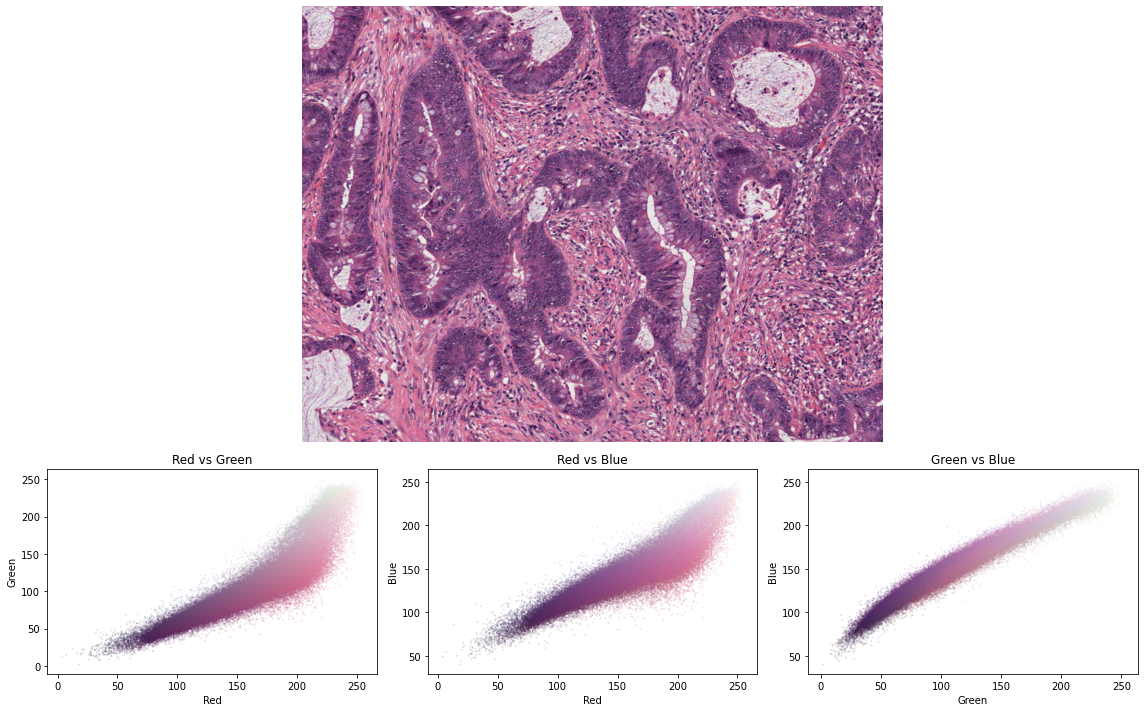

In [7]:
################################################################
############################ TEST ##############################
################################################################

plot_colors_histo(
    img = img_he,
    func = extract_rgb_channels,
    labels = ["Red", "Green", "Blue"],
)

Based on the result of the plot above

* **Q2 (1 pts)**: Do you think you can find a simple manual thresholding approach to isolate the tumor components? (Justify)
    * **Answer**:  Yes since tumor components are stained more strongly and thus have a dominant purple/blue coloration.
* **Q3 (1 pts)**: Implement your own manual thresholding in `apply_rgb_threshold` to estimate the tumor location. Use the function `plot_thresholded_image` below to display your estimation results. Do you think your estimation is reliable? (justify)
    * **Answer**: The estimate is not very reliable because it depends on a manually set threshold which does not generalize well.

In [8]:
def apply_rgb_threshold(img):
    """
    Apply threshold to input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract RGB channels
    data_red, data_green, data_blue = extract_rgb_channels(img=img)
    
    # ------- CODE HERE --------------
    img_th = (data_red < 150) & (data_green < 110) & (data_blue < 150)
    # --------------------------------
    
    return  img_th

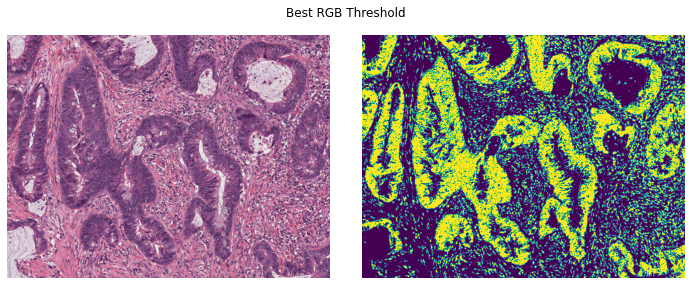

In [9]:
################################################################
############################ TEST ##############################
################################################################

# Plot best RGB thresholding
plot_thresholded_image(img=img_he, func=apply_rgb_threshold, title="Best RGB Threshold")

## Part 1.2 - Other colorspaces (3 pts)

So far we used the standard RGB colorspace to apply our thresholding. In this section, you will convert the image to a different color space. 

* **Q1 (1 pts)**: Use the function `rgb2hsv` from the skimage package ([see doc](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html)) to convert the input image from RGB to HSV in function `extract_hsv_channels`.
* **Q2 (1 pts)**: Can you see any difference between the use of the RGB or HSV space? (justify)
    * **Answer**: Yes there are differences. RGB is more sensitive to lightining condition and thus the threshold require more tuning for each picture unlike HSV which are more robust by separating the color and intensity

In [ ]:
def extract_hsv_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # ------- CODE HERE --------------
    hsv_img = rgb2hsv(img)
    
    data_h = hsv_img[:, :, 0]  # Hue channel
    data_s = hsv_img[:, :, 1]  # Saturation channel
    data_v = hsv_img[:, :, 2]  # Value channel
    # --------------------------------
    
    return data_h, data_s, data_v

In [ ]:
################################################################
############################ TEST ##############################
################################################################

# Call plotting function with your implemented function
plot_colors_histo(
    img = img_he,
    func = extract_hsv_channels,
    labels = ["Hue", "Saturation", "Value"],
)

* **Q3 (1 pts)**: Based on your results, try again to find the best manual threshold in function `apply_hsv_threshold`. Do you think your estimation is reliable? (justify)
    * **Answer**: Somewhat yes. It's more robust than previously when we used the RGB channel, but it's still not perfect and require fine-tuning of the threshold which prevent it from generalizing well.

In [ ]:
def apply_hsv_threshold(img):
    """
    Apply threshold to the input image in hsv colorspace.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract HSV channels
    data_h, data_s, data_v = extract_hsv_channels(img=img)
    
    # ------- CODE HERE --------------
    hue_thresh = 0.4
    sat_thresh = 0.4
    val_thresh = 0.35
    
    img_th = (data_h > hue_thresh) & (data_s > sat_thresh) & (data_v > val_thresh)
    
    # --------------------------------
    
    return  img_th

In [ ]:
################################################################
############################ TEST ##############################
################################################################

# Find threshold(s) in the hsv channels
img_th=apply_hsv_threshold(img_he)
plot_thresholded_image(img=img_he, func=apply_hsv_threshold, title="Threshold in HSV color space")

## Part 1.3 - Morphology (5 pts)

To proceed, we will use your results from the previous thresholding (namely `apply_hsv_threshold`) as the starting point. In this exercise, we will try to clean the masked images using morphology to get a better estimation of the tumor area.

* **Q1 (1 pts)**: Implement the functions `apply_closing` and `apply_opening` with operations `closing` ([see doc](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.closing)), `opening` ([see doc](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.opening)) using the disk sizes arguments ([see doc](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk)).
* **Q2 (1 pts)**: We test disk sizes: $1, 2, 5, 10$. Comment on the quality of the results.
    * **Answer**: The greater the disk, the more noise is removed and larger, smooth tumor region appear, but we loose the smaller tumor. It's again a tradeoff, and we have to choose a threshold.

In [ ]:
def apply_closing(img_th, disk_size):
    """
    Apply closing to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for opening

    Return
    ------
    img_closing: np.ndarray (M, N)
        Image after closing operation
    """

    # Define default value for output image
    img_closing = np.zeros_like(img_th)

    # ------- CODE HERE --------------
    img_closing = closing(img_th, disk(disk_size))
    # --------------------------------

    return img_closing


def apply_opening(img_th, disk_size):
    """
    Apply opening to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for opening

    Return
    ------
    img_opening: np.ndarray (M, N)
        Image after opening operation
    """

    # Define default value for output image
    img_opening = np.zeros_like(img_th)

    # ------- CODE HERE --------------
    img_opening = opening(img_th, disk(disk_size))
    # --------------------------------

    return img_opening


In [ ]:
################################################################
############################ TEST ##############################
################################################################

plot_close_open(img_th, apply_closing, apply_opening)

* **Q3 (1 pts)** Implement the functions `remove_holes` and `remove_objects` using operations [remove_small_holes](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_holes), [remove_small_objects](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects) from skimage package, respectively.
* **Q4 (1 pts)** We test the functions using area sizes: $10, 50, 100$, and $500$. Comment on the quality of the results.
    * **Answer**: It works well, we obtain a positive and negative mask that match with the tumor and complement each other and allow to distinguish easily the tumor.

In [ ]:
def remove_holes(img_th, size):
    """
    Remove holes from input image that are smaller than size argument.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    size: int
        Minimal size of holes

    Return
    ------
    img_holes: np.ndarray (M, N)
        Image after remove holes operation
    """

    # Define default value for input image
    img_holes = np.zeros_like(img_th)

    # ------- CODE HERE --------------
    img_holes = remove_small_holes(img_th, area_threshold=size, connectivity=1)
    # --------------------------------

    return img_holes


def remove_objects(img_th, size):
    """
    Remove objects from input image that are smaller than size argument.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    size: int
        Minimal size of objects

    Return
    ------
    img_obj: np.ndarray (M, N)
        Image after remove small objects operation
    """

    # Define default value for input image
    img_obj = np.zeros_like(img_th)

    # ------- CODE HERE --------------
    img_obj = remove_small_objects(img_th, min_size=size, connectivity=1)
    # --------------------------------

    return img_obj


In [ ]:
################################################################
############################ TEST ##############################
################################################################

plot_remove_holes_objects(img_th, remove_holes, remove_objects)

* **Q5 (1 pts)** Based on your previous results, implement the function `apply_morphology` that combines morphology functions to improve your tumor detection results from HSV thresholding. In this exercise, we prioritize having a higher number of false positives rather than false negatives, as mistakenly labeling non-tumor regions as tumors (over-segmentation) is preferable to missing actual tumor regions, which could lead to undetected cancerous areas and delayed treatment.

In [ ]:
def apply_morphology(img_th):
    """
    Apply morphology to thresholded image

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.

    Return
    ------
    img_morph: np.ndarray (M, N)
        Image after morphological operations
    """

    img_morph = np.zeros_like(img_th)
    
    # ------- CODE HERE --------------
    disk_size = 1
    hole_size = 100
    object_size = 300
    img_morph = apply_opening(img_th, disk_size)  # Remove small noise
    img_morph = apply_closing(img_morph, disk_size)  # Close small gaps
    img_morph = remove_holes(img_morph, hole_size)  # Remove small holes
    img_morph = remove_objects(img_morph, object_size)  # Remove small objects
    # --------------------------------
    
    return img_morph

In [ ]:
################################################################
############################ TEST ##############################
################################################################

img_best_morpho = apply_morphology(apply_hsv_threshold(img_he))
plot_morphology_best(
    img_source=img_he,
    img_best=img_best_morpho,
)

## Part 1.4 - Region Growing (4 pts)

* **Q1 (3 pts)** In this section we ask you to implement from scratch your own `region_growing` function to detect the tumor area. The function should take as input an RGB image, seeds that are manual initialization points in the tumor area, and the maximum number of iterations to perform. ote that the function also includes the kwargs argument. You can use it to add additional parameters to your function if needed (see [doc kwargs](https://book.pythontips.com/en/latest/args_and_kwargs.html)). Importantly, for timing reasons, a single explicit for loop on iterations is expected. An explicit for loop on pixels or neighbours will be accepted but penalised by 1 point. Use numpy tools to succeed.
* **Q2 (1 pts)** Your function is then used to perform region growing using multiple iterations. Comment on the quality of the results based on the number of iterations performed as well as the running time.
    * **Answer**: we see that as n_max increase at first not every tumor is detected. but as n_max the accuracy plateau and we still miss a lot of the tumor while spending more time on computation.

In [ ]:
def region_growing(
    seeds: list[tuple],
    img: np.ndarray,
    n_max: int = 5,
    **kwargs
):
    """
    Run region growing on input image using seed points.

    Args
    ----
    seeds: list of tuple
        List of seed points
    img: np.ndarray (M, N, C)
        RGB image of size M, N, C
    n_max: int
        Number maximum of iterations before stopping algorithm

    Return
    ------
    rg: np.ndarray (M, N)
        Image after region growing has been performed
    """
    
    M, N, _ = img.shape
    rg = np.zeros((M, N)).astype(bool)
    
    # ------------------
    # Your code here ... 
    # ------------------

    gray_img = img.mean(axis=-1) # Convert to grayscale

    rg[tuple(zip(*seeds))] = True # Set seed points to True

    for _ in range(n_max):
        n_up = np.zeros_like(rg) # create a new array with the same shape as rg
        n_up[1:, :] = rg[:-1, :] # Shift the values of rg one row up

        n_down = np.zeros_like(rg) # Create a new array with the same shape as rg
        n_down[:-1, :] = rg[1:, :] # Shift the values of rg one row down

        n_left = np.zeros_like(rg) # Create a new array with the same shape as rg
        n_left[:, 1:] = rg[:, :-1] # Shift the values of rg one olumn to the left

        n_right = np.zeros_like(rg) # Create a new array with the same  shape as rg
        n_right[:, :-1] = rg[:, 1:] # Shift the values of rg one column to the right

        neighbors = n_up | n_down | n_left | n_right # Combine all the neighbors into one array

        new_pixels = neighbors & ~rg  # Get new neighbors that are not already in the region

        mean_intensity = np.mean(gray_img[rg]) # Calculate the mean intensity of the region

        threshold = kwargs.get("threshold", 15.0) # Get the threshold value
        check_thresh = np.abs(gray_img - mean_intensity) < threshold # If mean intensity is less than the threshold

        new_pixels = new_pixels & check_thresh # Get the new pixels that satisfy the condition

        if not np.any(new_pixels):
            break

        rg |= new_pixels # Add the new pixels to the region

                    
    return rg

In [ ]:
# Add you additional arguments in the dictionary below
kwargs = {"tolerance": 10, "channel": 0}

In [ ]:
################################################################
############################ TEST ##############################
################################################################

img_grow = plot_tumor_region_growing(img_he, region_growing, **kwargs)

## Part 1.5 - Final Comparison (1 pts)

* **Q1 (1 pts)** Run the cell below. Based on your observation, which approach do you think gives the best estimation of the tumor area? (justify)
    * **Answer**: We see that the best approach is HSV thresholding + Morphology. HSV thresolding alone is sensitive to noise and thus color wrongly large region. Region growing ignore most tumor and thus make it a very bad choice for this application.

In [ ]:
################################################################
############################ TEST ##############################
################################################################

plot_final_comparison(img_he, img_th, img_best_morpho, img_grow)

---
# Part 2 - Sandbox [8 pts]

For the second part, you will work on a new HE case without help. This time we ask you to
* **Q1 (4 pts)**: detect and compute the area of the blood cells,
* **Q2 (4 pts)**: detect and compute the area of the mucin.

Provide your results to the function `plot_results`. See the example below. Be careful, the completely white area is not mucin. It is the slide background and should be discarded. Moreover, you can focus on the large blood cell aggregates (large red areas)

In [ ]:
img_he2 = show_exo2_figure()

In [ ]:
    M, N, C = np.shape(img_he2)
    mask_blood = np.zeros((M, N))
    mask_mucin = np.zeros((M, N))

    # ------- CODE HERE --------------
    # Extract HSV channels
    data_h, data_s, data_v = extract_hsv_channels(img_he2)

    # Define thresholds for blood detection (red regions)
    mask_blood = ((data_h < 0.1)| (data_h > 0.9)) & (data_s > 0.45) & (data_v > 0.3)

    # Define thresholds for mucin detection (grayish/white regions)
    mask_mucin = (data_h > 0.7) & ((data_s > 0.05) & (data_s < 0.12)) & (data_v > 0.6)

    # Apply morphological operations to refine the masks
    disk_size = 3  # Adjusting structural element size for better refinement
    mask_blood = apply_opening(mask_blood, disk_size)
    mask_blood = apply_closing(mask_blood, disk_size)

    mask_mucin = apply_opening(mask_mucin, disk_size)
    mask_mucin = apply_closing(mask_mucin, disk_size)

    # --------------------------------

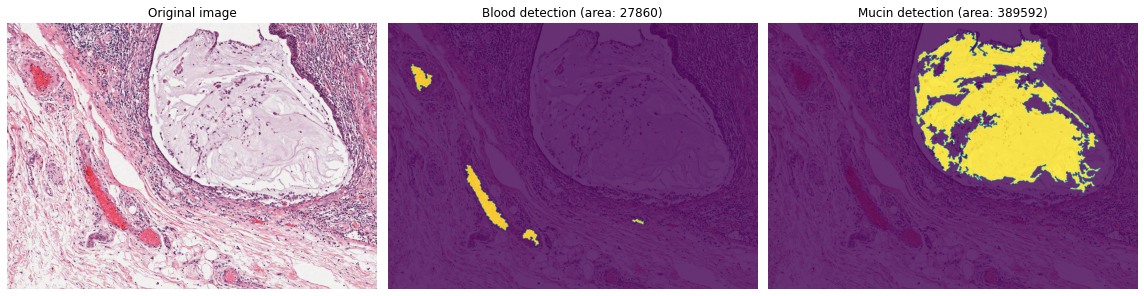

In [33]:
################################################################
############################ TEST ##############################
################################################################

plot_results(img=img_he2, mask_blood=mask_blood, mask_mucin=mask_mucin)